In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


# Plot data related to the chemostat experiment

In [220]:
git_folder = Path('../..')
figure_folder = git_folder / 'Figures' /'chemostat'
figure_folder.mkdir(parents=True, exist_ok=True)
data_folder_1 = git_folder / 'data' / 'this_project' / '3_keio_strains_chemostat'

fn_chemostat_od = data_folder_1 / '3A_chemostat_OD.csv'
fn_tubes = data_folder_1 / '3E_exometabolome_sucB_aceE_strains_OD.csv'
fn_tube_samples = data_folder_1 / '3F_exometabolome_sucB_aceE_strains_samples.csv'

fn_exometabolome_nM = data_folder_1 / '3G_exometabolome_nM.csv'
fn_exometabolome_counts = data_folder_1 / '3H_exometabolome_counts.csv'


In [221]:
tab10_cmap = sns.color_palette("tab10", 10)

set2 = sns.color_palette("Set2", 8)
strains_cmap = {
    'ΔaceE': tab10_cmap[1],
    'ΔsucB': tab10_cmap[8],
    'E. coli WT': tab10_cmap[0],
    'ΔaceE-M2':set2[3],
    'ΔaceE-M3':set2[0],
    'ΔaceE-M4':set2[6],
    'ΔsucB-M5':set2[5],
    'ΔsucB-M6':set2[2],
    'ΔsucB-M7':set2[7],
}

label_mapping = {
    'aceE-M2': 'ΔaceE-M2',
    'aceE-M3': 'ΔaceE-M3',
    'aceE-M4': 'ΔaceE-M4',
    'WT': 'E. coli WT',
    'aceE': 'ΔaceE',
    'sucB-M5': 'ΔsucB-M5',
    'sucB-M6': 'ΔsucB-M6',
    'sucB-M7': 'ΔsucB-M7',
    'sucB': 'ΔsucB',
}




# Plot chemostat OD

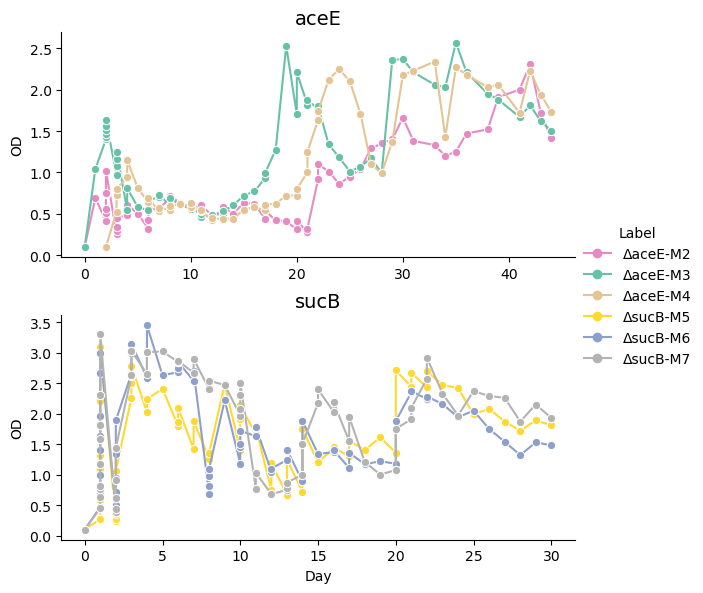

In [222]:
chemostat_od = pd.read_csv(fn_chemostat_od)
chemostat_od['Label'] = chemostat_od['Strain-Bioreactor'].map(label_mapping)
g = sns.relplot(data=chemostat_od, x='Day', y='OD', hue = 'Label', kind='line',
            aspect=2, marker = 'o', row = 'Strain', height=3, estimator=None,
            facet_kws={'sharex':False, 'sharey':False,}, palette=strains_cmap,)
g.set_titles("{row_name}", size = 14)  # Sets titles to only display the strain name

plt.savefig(figure_folder / 'chemostat_OD.png', dpi=300, bbox_inches='tight')

# Plot OD curves of selected colonies of aceE and sucB

In [223]:
df_tubes = pd.read_csv(fn_tubes)
df_samples = pd.read_csv(fn_tube_samples)

In [224]:
df_tubes.rename(columns={'Hours': 'Time [h]'}, inplace=True)
df_samples.rename(columns={'Hours': 'Time [h]'}, inplace=True)

In [225]:
df_samples['Strain abbrv.'].unique()

array(['WT', 'aceE', 'aceE-M2', 'aceE-M3', 'aceE-M4', 'sucB', 'sucB-M5',
       'sucB-M6', 'sucB-M7'], dtype=object)

In [226]:
set2

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

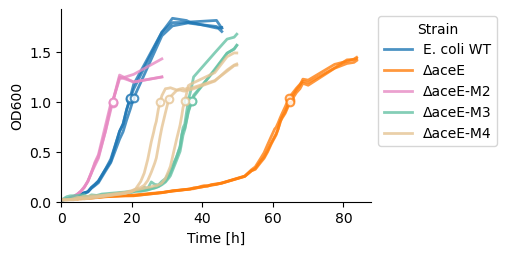

In [227]:
aceE_abbrv = ['WT', 'aceE', 'aceE-M2', 'aceE-M3', 'aceE-M4']

df_tubes['Label'] = df_tubes['Strain abbrv.'].map(label_mapping)
aceE_idx = df_tubes['Strain abbrv.'].isin(aceE_abbrv)
fig, ax  = plt.subplots(figsize=(4, 2.5))
ax = sns.lineplot(data = df_tubes.loc[aceE_idx], x = 'Time [h]', y = 'OD600', hue = 'Label', estimator=None,
                   units='Replicate', palette=strains_cmap, lw = 2, ax = ax, alpha = 0.8)
for strain in aceE_abbrv:
    sidx = df_samples['Strain abbrv.']==strain
    label = label_mapping[strain]
    ax.scatter(x = df_samples.loc[sidx, 'Sampling time'], y = df_samples.loc[sidx, 'Sample OD'], c = 'w', 
               s = 30, label = label, edgecolor =strains_cmap[label], alpha = 0.8, zorder = 10, linewidths=1.5)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title = 'Strain', fontsize = 10, ncol = 1,)
ax.set_xlim(0)
ax.set_ylim(0)
sns.despine()
plt.savefig(figure_folder / 'aceE_sampling.pdf', bbox_inches='tight')

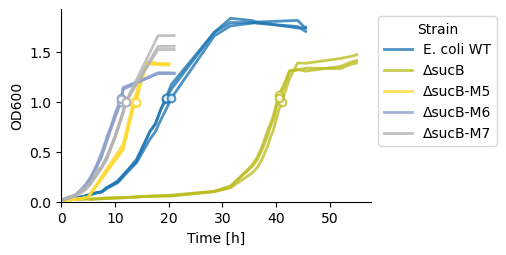

In [228]:
sucB_abbrv = ['WT', 'sucB', 'sucB-M5', 'sucB-M6', 'sucB-M7']

df_tubes['Label'] = df_tubes['Strain abbrv.'].map(label_mapping)
sucB_idx = df_tubes['Strain abbrv.'].isin(sucB_abbrv)
fig, ax  = plt.subplots(figsize=(4, 2.5))
ax = sns.lineplot(data = df_tubes.loc[sucB_idx], x = 'Time [h]', y = 'OD600', hue = 'Label', estimator=None,
                   units='Replicate', palette=strains_cmap, lw = 2, ax = ax, alpha = 0.8,
                   hue_order=[label_mapping[x] for x in sucB_abbrv])
for strain in sucB_abbrv:
    sidx = df_samples['Strain abbrv.']==strain
    label = label_mapping[strain]
    ax.scatter(x = df_samples.loc[sidx, 'Sampling time'], y = df_samples.loc[sidx, 'Sample OD'], c = 'w', 
               s = 30, label = label, edgecolor =strains_cmap[label], alpha = 0.8, zorder = 10, linewidths=1.5)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title = 'Strain', fontsize = 10, ncol = 1,)
ax.set_xlim(0)
ax.set_ylim(0)
sns.despine()
plt.savefig(figure_folder / 'sucB_sampling.pdf', bbox_inches='tight')

## Estimate growth rate

In [229]:
df_tubes

,Strain abbrv.,Replicate,Strain,Time [h],OD600,Label
0,WT,A,E. coli BW25113,0.0,0.016,E. coli WT
1,WT,B,E. coli BW25113,0.0,0.016,E. coli WT
2,WT,C,E. coli BW25113,0.0,0.019,E. coli WT
3,aceE,A,aceE-Ancestor,0.0,0.018,ΔaceE
4,aceE,B,aceE-Ancestor,0.0,0.020,ΔaceE
...,...,...,...,...,...,...
1261,sucB-M5,B,sucB-M5-D30-4,19.0,1.383,ΔsucB-M5
1262,sucB-M5,C,sucB-M5-D30-4,19.0,1.368,ΔsucB-M5
1263,sucB-M5,A,sucB-M5-D30-4,20.0,1.379,ΔsucB-M5
1264,sucB-M5,B,sucB-M5-D30-4,20.0,1.379,ΔsucB-M5


In [230]:
dfi

,Strain abbrv.,Replicate,Strain,Time [h],OD600,Label,ln(OD)
1226,sucB-M5,C,sucB-M5-D30-4,0.000000,0.015,ΔsucB-M5,-4.199705
1229,sucB-M5,C,sucB-M5-D30-4,1.000000,0.017,ΔsucB-M5,-4.074542
1232,sucB-M5,C,sucB-M5-D30-4,2.000000,0.021,ΔsucB-M5,-3.863233
1235,sucB-M5,C,sucB-M5-D30-4,3.500000,0.030,ΔsucB-M5,-3.506558
1238,sucB-M5,C,sucB-M5-D30-4,5.000000,0.047,ΔsucB-M5,-3.057608
1241,sucB-M5,C,sucB-M5-D30-4,11.500000,0.540,ΔsucB-M5,-0.616186
1244,sucB-M5,C,sucB-M5-D30-4,13.416667,0.959,ΔsucB-M5,-0.041864
1247,sucB-M5,C,sucB-M5-D30-4,13.916667,1.000,ΔsucB-M5,0.000000
1250,sucB-M5,C,sucB-M5-D30-4,14.500000,1.138,ΔsucB-M5,0.129272
1253,sucB-M5,C,sucB-M5-D30-4,16.000000,1.394,ΔsucB-M5,0.332177


In [231]:
label_to_abbrv = {val:key for key, val in label_mapping.items()}

E. coli WT A Axes(0.0599794,0.892888;0.296451x0.0943964)
[ 3.66666667 19.5       ] [-2.9786971   0.15773055]
E. coli WT B Axes(0.37482,0.892888;0.296451x0.0943964)
[ 3.66666667 19.5       ] [-2.96110827  0.16702961]
E. coli WT C Axes(0.68966,0.892888;0.296451x0.0943964)
[ 3.66666667 20.5       ] [-2.96335619  0.18476448]
ΔaceE A Axes(0.0599794,0.783975;0.296451x0.0943964)
[52.         66.66666667] [-1.37310547  0.22426265]
ΔaceE B Axes(0.37482,0.783975;0.296451x0.0943964)
[52.         66.66666667] [-1.30667387  0.28586069]
ΔaceE C Axes(0.68966,0.783975;0.296451x0.0943964)
[52.         66.66666667] [-1.38703956  0.20574558]
ΔaceE-M2 A Axes(0.0599794,0.675062;0.296451x0.0943964)
[ 3.66666667 14.5       ] [-2.72373575  0.21944457]
ΔaceE-M2 B Axes(0.37482,0.675062;0.296451x0.0943964)
[ 3.66666667 14.5       ] [-2.68544365  0.16202796]
ΔaceE-M2 C Axes(0.68966,0.675062;0.296451x0.0943964)
[ 3.66666667 14.5       ] [-2.73139082  0.17416231]
ΔsucB A Axes(0.0599794,0.566149;0.296451x0.0943964)


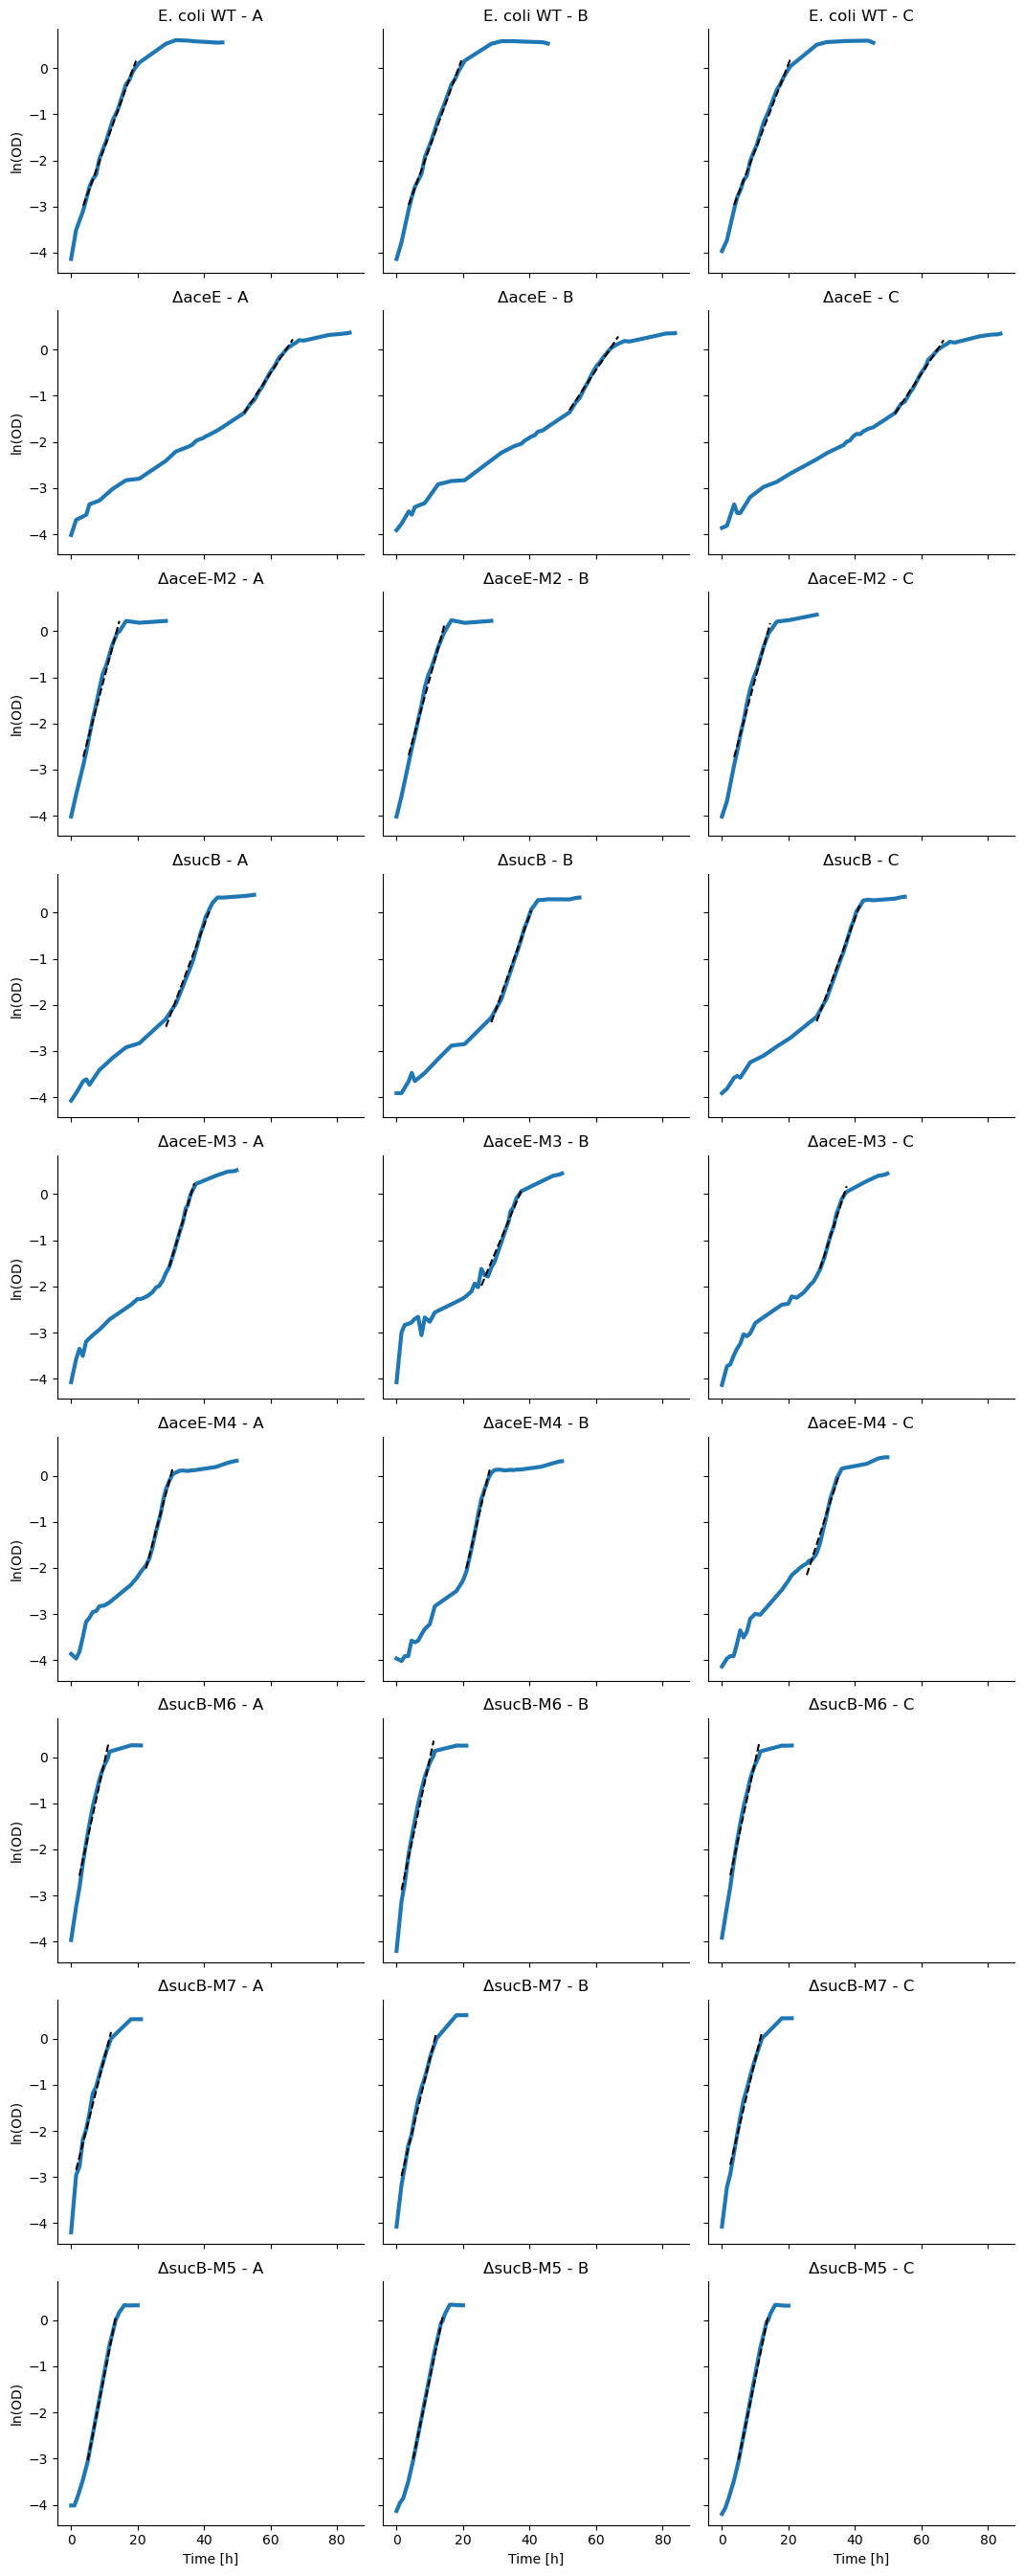

In [232]:
all_strains = set(aceE_abbrv + sucB_abbrv)
df_tubes['ln(OD)'] = np.log([x for x in df_tubes['OD600']])
g = sns.relplot(data=df_tubes, x = 'Time [h]', y = 'ln(OD)', row = 'Label', col = 'Replicate', kind = 'line', lw = 3, height = 3, aspect = 1.2)

g.set_titles("{row_name} - {col_name}", size = 12)  # Sets titles to only display the strain name

data = []
default_od_range = [0.05, 1]
for label in df_tubes['Label'].unique():
    for j, rep in enumerate('ABC'):
        idx = (df_tubes['Label']==label) & (df_tubes['Replicate']==rep)
        dfi = df_tubes.loc[idx]
        ax = g.axes_dict[(label, rep)]
        if label == 'ΔaceE':
            od_range = [0.25,1.1]
        elif label == 'ΔsucB':
            od_range = [0.1, 1.1]
        elif label == 'ΔaceE-M3':
            od_range = [0.2, 1.1]
        elif label == 'ΔaceE-M4':
            od_range = [0.15, 1]
        else:
            od_range = default_od_range
        print(label, rep, ax)
        idx0 = (dfi['OD600']-od_range[0]).abs().argmin()
        idx1 = (dfi['OD600']-od_range[1]).abs().argmin()
        
        ln_OD = dfi.iloc[idx0:idx1+1]['ln(OD)']
        hours = dfi.iloc[idx0:idx1+1]['Time [h]']
        
        hours = hours.loc[ln_OD.notna()]
        ln_OD = ln_OD.loc[ln_OD.notna()]
        fit = np.polyfit(hours, ln_OD, 1)
        x_arr = np.linspace(hours.min(), hours.max(), 2)
        y_arr = x_arr*fit[0]+fit[1]
        print(x_arr, y_arr)
        # delta_ln_OD = - dfi.iloc[idx0]['ln(OD)']
        # delta_t = dfi.Hours.iloc[idx1]-dfi.Hours.iloc[idx0]
        # growth_rate = delta_ln_OD/delta_t
        growth_rate = fit[0]
        abbrv = label_to_abbrv[label]
        data.append([abbrv, label, rep, growth_rate])

        # Plot
        # ax.plot([dfi.Hours.iloc[idx0], dfi.Hours.iloc[idx1]], [dfi.iloc[idx0]['ln(OD)'], dfi.iloc[idx1]['ln(OD)']], c = 'k', ls = '--')
        ax.plot(x_arr, y_arr, c = 'k', ls = '--')

    

In [233]:
rate_data = pd.DataFrame(data, columns = ['Strain abbrv.', 'Label', 'Replicate', 'Growth rate'])

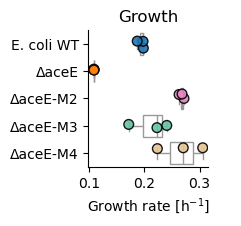

In [298]:
# fig, ax = plt.subplots(1,figsize=(2, 2)) 
idx = rate_data['Strain abbrv.'].isin(aceE_abbrv)
g = sns.catplot(data = rate_data.loc[idx], y = 'Label', x = 'Growth rate', color = 'w', #ax = ax,
            order = [label_mapping[x] for x in aceE_abbrv], kind = 'box', height = 2.1, aspect = 1.2)
g.map_dataframe(sns.stripplot, y = 'Label', x = 'Growth rate', hue = 'Label', 
              palette = strains_cmap, ax = ax, alpha = 0.9, size = 7, edgecolor='k', linewidth = 1,
              jitter=0.2)

sns.despine()
g.set_axis_labels('Growth rate [h$^{-1}$]', '')
for ax in g.axes.flat:
    ax.set_title('Growth', size = 12)
plt.savefig(figure_folder / 'aceE_growth_rate.pdf', bbox_inches='tight')

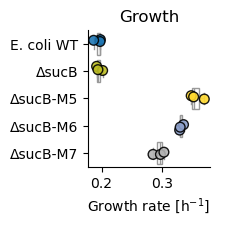

In [297]:
# fig, ax = plt.subplots(1,figsize=(2, 2)) 
idx = rate_data['Strain abbrv.'].isin(sucB_abbrv)
g = sns.catplot(data = rate_data.loc[idx], y = 'Label', x = 'Growth rate', color = 'w', #ax = ax,
            order = [label_mapping[x] for x in sucB_abbrv], kind = 'box', height = 2.1, aspect = 1.2)
g.map_dataframe(sns.stripplot, y = 'Label', x = 'Growth rate', hue = 'Label', 
              palette = strains_cmap, ax = ax, alpha = 0.9, size = 7, edgecolor='k', linewidth = 1,
              jitter=0.2)

sns.despine()
g.set_axis_labels('Growth rate [h$^{-1}$]', '')
for ax in g.axes.flat:
    ax.set_title('Growth', size = 12)
plt.savefig(figure_folder / 'sucB_growth_rate.pdf', bbox_inches='tight')

# Plot metabolomics

In [243]:
from statannotations.Annotator import Annotator


In [236]:
df_nM = pd.read_csv(fn_exometabolome_nM)
df_nM.replace({'Concentration [nM]': {'ND':np.nan}}, inplace=True)
df_nM['Concentration [nM]'] = df_nM['Concentration [nM]'].astype(float)

df_counts = pd.read_csv(fn_exometabolome_counts)

In [237]:
df_nM['Label'] = df_nM['Strain'].map(label_mapping)
df_counts['Label'] = df_counts['Strain'].map(label_mapping)

In [238]:
df_nM['Concentration [μΜ]'] = df_nM['Concentration [nM]']/1000

In [281]:
df_nM.loc[df_nM.Metabolite=='Lactate']

,Strain,Replicate,Metabolite,Concentration [nM],Label,Concentration [μΜ]
60,aceE,A,Lactate,2.300666e+06,ΔaceE,2300.665557
61,aceE,B,Lactate,2.212510e+06,ΔaceE,2212.509988
62,aceE,C,Lactate,2.270622e+06,ΔaceE,2270.621998
63,aceE-M2,A,Lactate,5.827375e+05,ΔaceE-M2,582.737523
64,aceE-M2,B,Lactate,6.122551e+05,ΔaceE-M2,612.255090
65,aceE-M2,C,Lactate,5.113140e+05,ΔaceE-M2,511.313986
66,aceE-M3,A,Lactate,2.896341e+06,ΔaceE-M3,2896.341338
67,aceE-M3,B,Lactate,3.806189e+06,ΔaceE-M3,3806.188980
68,aceE-M3,C,Lactate,3.604152e+06,ΔaceE-M3,3604.152106
69,aceE-M4,A,Lactate,3.267559e+05,ΔaceE-M4,326.755929


## Discard very high outlier values for M7-B

In [239]:
idx_outliers = (df_nM['Strain'] =='sucB-M7')&(df_nM.Replicate == 'B')&(df_nM.Metabolite.isin(['Citrate', 'Isocitrate']))
df_nM.loc[idx_outliers, 'Concentration [μΜ]'] = np.nan

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

ΔaceE vs. ΔaceE-M2: Welch's t-test independent samples, P_val:2.237e-06 t=4.275e+01
ΔaceE vs. ΔaceE-M3: Welch's t-test independent samples, P_val:4.986e-02 t=-4.238e+00
ΔaceE vs. ΔaceE-M4: Welch's t-test independent samples, P_val:6.815e-07 t=5.478e+01
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

ΔaceE vs. ΔaceE-M2: Welch's t-test independent samples, P_val:5.033e-02 t=-2.930e+00
ΔaceE vs. ΔaceE-M3: Welch's t-test independent samples, P_val:5.792e-04 t=-4.153e+01
ΔaceE vs. ΔaceE-M4: Welch's t-test independent samples, P_val:1.277e-02 t=-8.766e+00


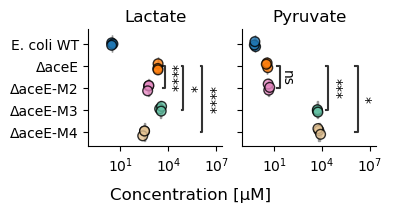

In [279]:
aceE_mets = ['Lactate', 'Pyruvate', 'Valine','Fructose-6-phosphate']
aceE_mets_main = ['Lactate', 'Pyruvate']
idx = (df_nM['Strain'].isin(aceE_abbrv))&(df_nM['Metabolite'].isin(aceE_mets_main))

g = sns.catplot(data = df_nM.loc[idx], y = 'Label', x = 'Concentration [μΜ]', 
            # hue = 'Label', 
            col = 'Metabolite', kind = 'box',
            # palette = strains_cmap, 
            color = 'w',
            height = 2.1, aspect = 1, col_wrap=2, sharex=True,
            col_order=aceE_mets_main, order = [label_mapping[x] for x in aceE_abbrv])
g.set_titles("{col_name}", size = 12)  # Sets titles to only display the strain name
g.map_dataframe(sns.stripplot, x = 'Concentration [μΜ]', y = 'Label',
                hue = 'Label', palette = strains_cmap, alpha = 0.8, size = 7, edgecolor='k', linewidth = 1,
                jitter=0.2)

# Set logarithmic scale for the x-axis and remove minor ticks
for ax in g.axes.flat:
    ax.set_xscale('log')  # Set log scale
    ax.tick_params(which='minor', bottom=False, left=False)  # Remove minor ticks
    ax.set_ylabel('')
    
    ax.set_xlabel('')
    ax.set_xlim(0.1, )
g.figure.supxlabel('Concentration [μΜ]', fontsize=12)

# Define pairs of groups to compare
pairs = [
    ("ΔaceE", "ΔaceE-M2"),
    ("ΔaceE", "ΔaceE-M3"),
    ("ΔaceE", "ΔaceE-M4"),
]

# Add statistical annotations
for ax, metabolite in zip(g.axes.flat, aceE_mets_main):
    data = df_nM.loc[(df_nM["Metabolite"] == metabolite) & idx]
    annotator = Annotator(ax, pairs, data=data, y="Label", x="Concentration [μΜ]",
                           orient = 'h', order=[label_mapping[x] for x in aceE_abbrv])
    annotator.configure(test="t-test_welch", text_format="star", loc="inside", verbose=1,
                        text_offset=0.1, line_offset=0.2, line_height=0.02)
    # annotator.configure(test="Kruskal", text_format="star", loc="inside", verbose=2)
    annotator.apply_and_annotate()
    
# plt.show()
plt.savefig(figure_folder / 'aceE_main_exometabolome.pdf', bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

ΔsucB vs. ΔsucB-M5: Welch's t-test independent samples, P_val:9.313e-02 t=2.454e+00
ΔsucB vs. ΔsucB-M6: Welch's t-test independent samples, P_val:2.131e-01 t=1.484e+00
ΔsucB vs. ΔsucB-M7: Welch's t-test independent samples, P_val:4.489e-02 t=3.632e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

ΔsucB vs. ΔsucB-M5: Welch's t-test independent samples, P_val:2.124e-03 t=7.397e+00
ΔsucB vs. ΔsucB-M6: Welch's t-test independent samples, P_val:8.799e-01 t=1.649e-01
ΔsucB vs. ΔsucB-M7: Welch's t-test independent samples, P_val:5.896e-02 t=3.201e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e

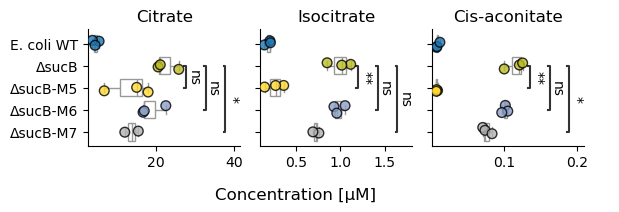

In [277]:
sucB_mets = ['Citrate', 'Isocitrate', 'Cis-aconitate','Adenosine', 'Glutamine']
sucB_mets_main = ['Citrate', 'Isocitrate', 'Cis-aconitate']
idx = (df_nM['Strain'].isin(sucB_abbrv))&(df_nM['Metabolite'].isin(sucB_mets_main))

g = sns.catplot(data = df_nM.loc[idx], y = 'Label', x = 'Concentration [μΜ]', 
            # hue = 'Label', 
            col = 'Metabolite', kind = 'box',
            # palette = strains_cmap, 
            color = 'w',
            height = 2.1, aspect = 1, col_wrap=3, sharex=False,
            col_order=sucB_mets_main, order = [label_mapping[x] for x in sucB_abbrv])
g.set_titles("{col_name}", size = 12)  # Sets titles to only display the strain name
g.map_dataframe(sns.stripplot, x = 'Concentration [μΜ]', y = 'Label',
                hue = 'Label', palette = strains_cmap, alpha = 0.8, size = 7, edgecolor='k', linewidth = 1,
                jitter=0.2)

# Set logarithmic scale for the x-axis and remove minor ticks
for ax in g.axes.flat:
    # ax.set_xscale('log')  # Set log scale
    ax.tick_params(which='minor', bottom=False, left=False)  # Remove minor ticks
    ax.set_ylabel('')
    ax.set_xlabel('')
g.figure.supxlabel('Concentration [μΜ]', fontsize=12)
    
# Define pairs of groups to compare
pairs = [
    ("ΔsucB", "ΔsucB-M5"),
    ("ΔsucB", "ΔsucB-M6"),
    ("ΔsucB", "ΔsucB-M7"),
]

# Add statistical annotations
for ax, metabolite in zip(g.axes.flat, sucB_mets_main):
    data = df_nM.loc[(df_nM["Metabolite"] == metabolite) & idx]
    annotator = Annotator(ax, pairs, data=data, y="Label", x="Concentration [μΜ]",
                           orient = 'h', order=[label_mapping[x] for x in sucB_abbrv])
    annotator.configure(test="t-test_welch", text_format="star", loc="inside", verbose=1,
                        text_offset=0.1, line_offset=0.2, line_height=0.02)
    # annotator.configure(test="Kruskal", text_format="star", loc="inside", verbose=2)
    annotator.apply_and_annotate()
    
# plt.show()
plt.savefig(figure_folder / 'sucB_main_exometabolome.pdf', bbox_inches='tight')

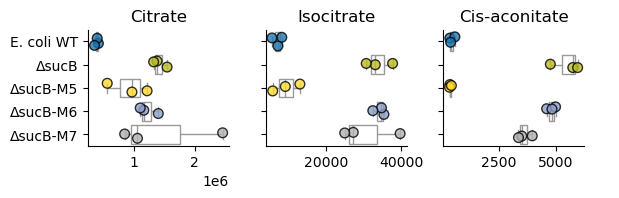

In [242]:
sucB_mets = ['Citrate', 'Isocitrate', 'Cis-aconitate','Adenosine', 'Glutamine']
sucB_mets_main = ['Citrate', 'Isocitrate', 'Cis-aconitate']
idx = (df_counts['Strain'].isin(sucB_abbrv))&(df_counts['Metabolite'].isin(sucB_mets_main))

g = sns.catplot(data = df_counts.loc[idx], y = 'Label', x = 'Counts', 
            # hue = 'Label', 
            col = 'Metabolite', kind = 'box',
            # palette = strains_cmap, 
            color = 'w',
            height = 2.1, aspect = 1, col_wrap=3, sharex=False,
            col_order=sucB_mets_main, order = [label_mapping[x] for x in sucB_abbrv])
g.set_titles("{col_name}", size = 12)  # Sets titles to only display the strain name
g.map_dataframe(sns.stripplot, x = 'Counts', y = 'Label',
                hue = 'Label', palette = strains_cmap, alpha = 0.8, size = 7, edgecolor='k', linewidth = 1,
                jitter=0.2)

# Set logarithmic scale for the x-axis and remove minor ticks
for ax in g.axes.flat:
    # ax.set_xscale('log')  # Set log scale
    ax.tick_params(which='minor', bottom=False, left=False)  # Remove minor ticks
    ax.set_ylabel('')
    ax.set_xlabel('')
# g.figure.supxlabel('Concentration [μΜ]', fontsize=12)
    

